In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [225]:
%matplotlib inline

In [226]:
download_durations=pd.read_csv("download_duration.csv")

In [227]:
download_durations.head()

,Duration
0,0.499148
1,0.128235
2,0.144293
3,0.131095
4,0.143774


In [228]:
analysis_durations=pd.read_csv("analysis_duration.csv")

In [229]:
analysis_durations.head()

,Duration
0,1.094086
1,1.068060
2,1.055788
3,1.061945
4,1.295053


In [230]:
upload_to_kafka_durations=pd.read_csv("upload_to_kafka_duration.csv")

In [231]:
upload_to_kafka_durations.head()

,Duration
0,0.011912
1,0.008638
2,0.011641
3,0.008381
4,0.012427


In [232]:
tarball_sizes=pd.read_csv("tarball_sizes.csv")

In [233]:
tarball_sizes.head()

,Size
0,6321
1,6493
2,6403
3,6915
4,13219


In [234]:
json_sizes=pd.read_csv("json_sizes.csv")

In [235]:
json_sizes.head()

,Size
0,4387
1,4387
2,4387
3,4383
4,4387


In [236]:
upload_timestamps=pd.read_csv("upload_timestamps.csv", parse_dates=[0])

In [237]:
upload_timestamps.head()

,Timestamp
0,2020-01-15 03:59:47
1,2020-01-15 08:19:25
2,2020-01-15 11:42:07
3,2020-01-15 14:58:48
4,2020-01-15 18:21:56


## Insights raw data uploads to S3 + Kafka

### Total uploads of insights raw data per day

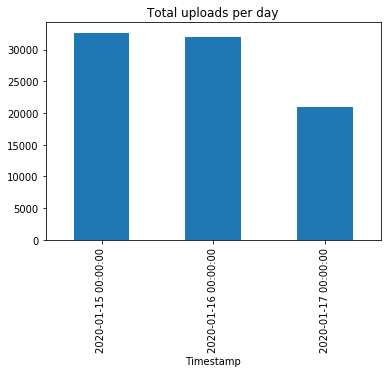

In [238]:
by_day = upload_timestamps.resample('1D', on='Timestamp').count()
by_day_plot = by_day.plot(title="Total uploads per day",legend=None, kind="bar")

### Total uploads of insights raw data per hour

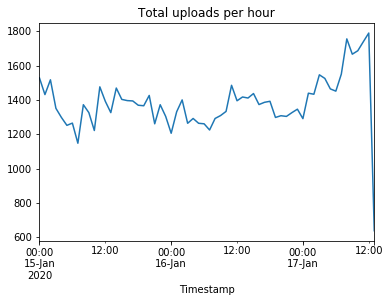

In [239]:
by_hour = upload_timestamps.resample('60min', on='Timestamp').count()
by_hour_plot = by_hour.plot(title="Total uploads per hour",legend=None)

### Total uploads of insights raw data per minute

In [240]:
by_minute = upload_timestamps.resample('1min', on='Timestamp').count()
by_minute.describe()

,Timestamp
count,3683.000000
mean,23.266630
std,8.662013
min,0.000000
25%,19.000000
50%,23.000000
75%,27.000000
max,208.000000


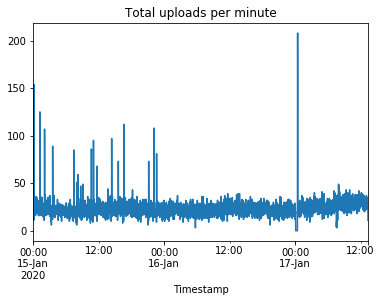

In [241]:
by_minute_plot = by_minute.plot(title="Total uploads per minute",legend=None)

In [242]:
download_durations.describe()

,Duration
count,1043.000000
mean,0.163541
std,0.055815
min,0.119289
25%,0.143617
50%,0.152909
75%,0.166216
max,1.105731


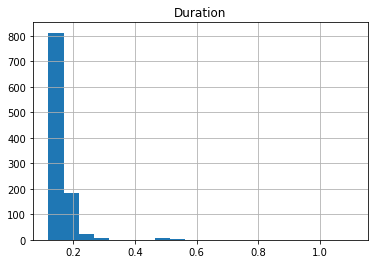

In [243]:
download_durations_histogram=download_durations.hist(bins=20)

In [244]:
analysis_durations.describe()

,Duration
count,1043.000000
mean,1.223845
std,0.416524
min,0.704329
25%,1.028769
50%,1.087946
75%,1.202589
max,4.486283


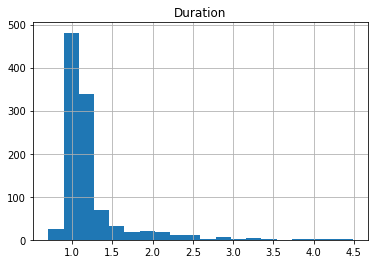

In [245]:
analysis_durations_histogram=analysis_durations.hist(bins=20)

In [246]:
upload_to_kafka_durations.describe()

,Duration
count,1526.000000
mean,0.011016
std,0.001674
min,0.007882
25%,0.009374
50%,0.011242
75%,0.011765
max,0.019010


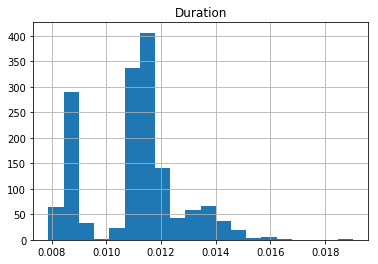

In [247]:
upload_to_kafka_durations_histogram=upload_to_kafka_durations.hist(bins=20)

In [248]:
total_durations = download_durations + analysis_durations + upload_to_kafka_durations

In [249]:
total_durations.describe()

,Duration
count,1043.000000
mean,1.398158
std,0.422949
min,0.862157
25%,1.198555
50%,1.261378
75%,1.380220
max,4.771932


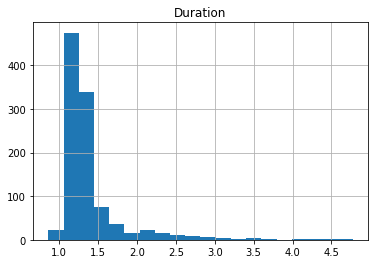

In [250]:
total_durations_histogram=total_durations.hist(bins=20)

In [251]:
tarball_sizes.describe()

,Size
count,1043.000000
mean,11521.607862
std,9819.080389
min,131.000000
25%,6581.500000
50%,6898.000000
75%,11811.500000
max,74475.000000


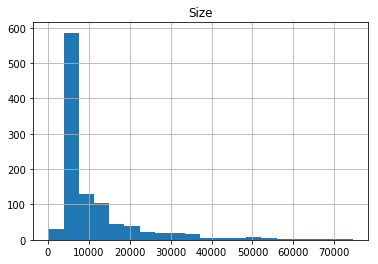

In [252]:
tarball_sizes_histogram=tarball_sizes.hist(bins=20)

In [253]:
json_sizes.describe()

,Size
count,1043.000000
mean,4403.524449
std,64.290877
min,3835.000000
25%,4384.000000
50%,4387.000000
75%,4437.000000
max,4511.000000


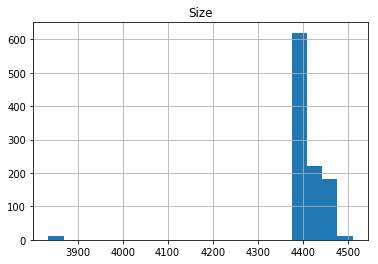

In [254]:
json_sizes_histogram=json_sizes.hist(bins=20)